In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

In [2]:
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    return mfccs

In [5]:
paths = []
labels = []
data = []
for dirname, _, filenames in os.walk(r"C:\Users\Lenovo\OneDrive\Desktop\speech emotion recognition\archive (1)"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        labels.append(int(filename[7:8])-1)
        wav_file_name = os.path.join(dirname, filename)
        data.append(extract_mfcc(wav_file_name))
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [6]:
data

[array([-6.9779260e+02,  5.4890041e+01,  6.6346520e-01,  1.2435786e+01,
         7.7339506e+00,  5.3075010e-01, -3.2166309e+00, -3.1593947e+00,
        -1.0977551e+01, -2.8487110e+00,  8.1529754e-01, -3.0370667e+00,
         1.9554468e+00, -3.7356679e+00,  4.3770033e-01,  7.8235644e-01,
        -4.0714283e+00, -1.8607767e+00, -1.3236902e+00, -9.2046338e-01,
        -5.9476104e+00, -5.0543827e-01, -2.3373911e+00, -4.5227795e+00,
        -1.6797223e+00, -8.1932092e-01, -4.8584828e+00,  2.5533599e-01,
        -2.1487043e+00,  1.4505497e-01, -2.0357561e+00, -2.1196339e+00,
        -2.7125885e+00, -1.8361270e+00, -3.2048054e+00, -1.5453684e+00,
        -1.0909374e+00, -1.7701062e+00, -3.5011320e+00, -1.5380875e+00],
       dtype=float32),
 array([-6.9285577e+02,  5.5363899e+01, -1.5483192e+00,  1.6038307e+01,
         8.8188105e+00, -1.4658625e-01, -1.3733919e+00, -5.2931800e+00,
        -1.1623182e+01, -1.3482836e+00,  8.4371459e-01, -2.6412783e+00,
         1.0172496e+00, -3.2715344e+00, 

In [7]:
data_array = np.asarray(data)
label_array = np.asarray(labels)
label_array.shape

labels_categorical = to_categorical(label_array)
labels_categorical.shape

(2880, 8)

In [8]:
data_array

array([[-6.97792603e+02,  5.48900414e+01,  6.63465202e-01, ...,
        -1.77010620e+00, -3.50113201e+00, -1.53808749e+00],
       [-6.92855774e+02,  5.53638992e+01, -1.54831922e+00, ...,
        -3.08697224e+00, -3.20974827e+00, -2.30715942e+00],
       [-6.91587891e+02,  5.80246620e+01,  1.59464687e-01, ...,
        -2.72953725e+00, -3.50890636e+00, -2.24637461e+00],
       ...,
       [-5.41251648e+02,  2.95957088e+01, -1.80013618e+01, ...,
        -3.89066815e-01, -9.71947491e-01, -3.92099889e-03],
       [-4.92652527e+02,  2.38879814e+01, -6.02665901e+00, ...,
         9.16377246e-01, -1.43268991e+00,  1.43001175e+00],
       [-5.17984802e+02,  2.95712147e+01, -3.90969896e+00, ...,
        -1.24556035e-01, -1.85192287e+00,  7.08550394e-01]], dtype=float32)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(np.array(data_array), labels_categorical, test_size = 0.20, random_state = 9)

In [10]:
number_of_samples = data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [12]:
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40,1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation("relu"))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation("relu"))
    model.add(Dense(8))
    model.add(Activation("softmax"))

    model.compile(loss = 'categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])
    return model


In [13]:
w = np.expand_dims(data_array[:training_samples],-1)

In [14]:
w.shape

(2304, 40, 1)

In [16]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(data_array[:training_samples], -1), labels_categorical[:training_samples], validation_data = (np.expand_dims(data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=300, shuffle=True)

Epoch 1/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.1530 - loss: 2.0802 - val_accuracy: 0.2396 - val_loss: 2.0255
Epoch 2/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.1944 - loss: 2.0139 - val_accuracy: 0.2569 - val_loss: 1.9317
Epoch 3/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.2221 - loss: 1.9461 - val_accuracy: 0.2882 - val_loss: 1.8929
Epoch 4/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.2435 - loss: 1.9052 - val_accuracy: 0.2812 - val_loss: 1.8286
Epoch 5/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2671 - loss: 1.8877 - val_accuracy: 0.2882 - val_loss: 1.8323
Epoch 6/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.2821 - loss: 1.8548 - val_accuracy: 0.3299 - val_loss: 1.7815
Epoch 7/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.2899 - loss: 1.8258 - val_accuracy: 0.3125 - val_loss: 1.7735
Epoch 8/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.3170 - loss: 1.8164 - val_accuracy: 0.

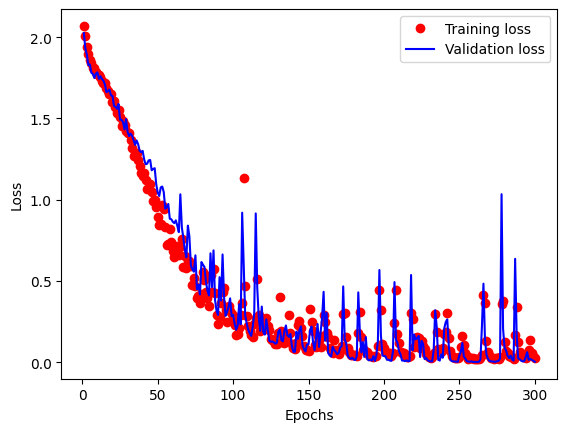

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range (1,len(loss)+1)

plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs , val_loss ,'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

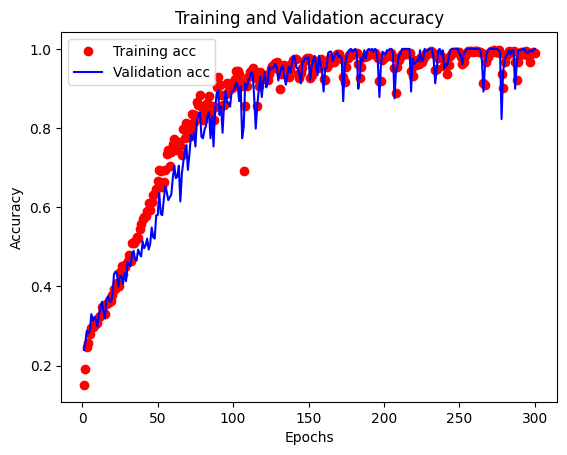

In [18]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

plt.plot(epochs,acc,'ro',label='Training acc')
plt.plot(epochs , val_acc ,'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
model_A.evaluate(np.expand_dims(data_array[training_samples+validation_samples:],-1),labels_categorical[training_samples + validation_samples:])

emotions = {1 : "neutral", 2 : "calm", 3 : "happy", 4 : "sad", 5 : 'angry',6 : "fearful", 7 : "disgust", 8 : "surprise"}
def predict(wav_filepath):
    test_point =  extract_mfcc(wav_filepath)
    test_point = np.reshape(test_point, newshape = (1,40,1))
    predictions = model_A.predict(test_point)
    print(emotions[np.argmax(predictions[0])+1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0017


In [22]:
predict(r"C:\Users\Lenovo\OneDrive\Desktop\speech emotion recognition\archive (1)\Actor_14\03-01-01-01-02-02-14.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
neutral


In [26]:
predict(r"C:\Users\Lenovo\OneDrive\Desktop\speech emotion recognition\TESS Toronto emotional speech set data\OAF_happy\OAF_bone_happy.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
fearful


In [30]:
predict(r"C:\Users\Lenovo\OneDrive\Desktop\speech emotion recognition\TESS Toronto emotional speech set data\YAF_fear\YAF_cab_fear.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
fearful


In [23]:
model_A.save('mymodel.h5')

In [24]:
modelc= tf.keras.models.load_model('mymodel.h5')